# Predictor Correlation

In [1]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_original_data()

# Data Cleaning

In [6]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# Plot Correlation

In [18]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status',
       'person_emp_length_sub_person_age', 'person_age_sub_person_emp_length'],
      dtype='object')

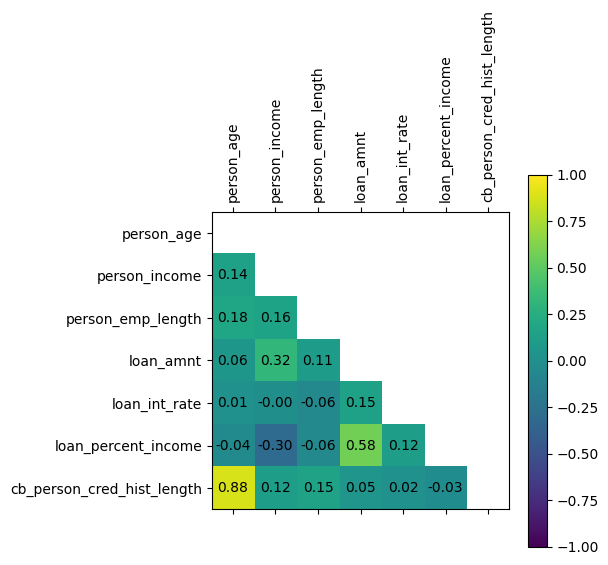

In [46]:
data_subset = data[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]

correlation = data_subset.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.matshow(correlation, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.savefig('correlation.pdf', bbox_inches='tight')
None

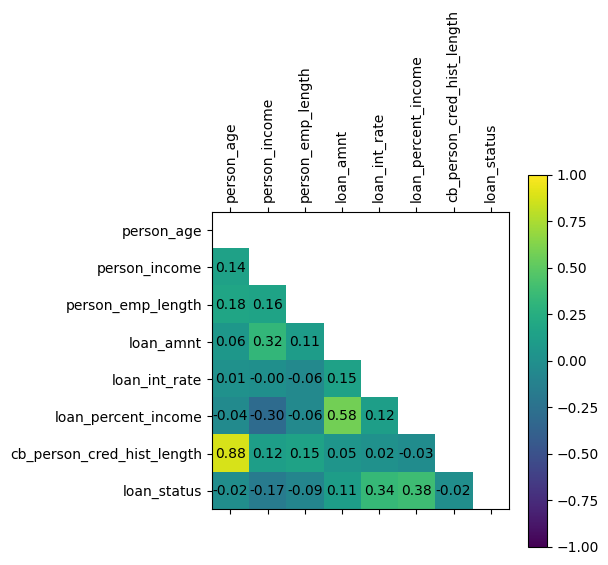

In [48]:
data_subset = data[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']]

correlation = data_subset.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient() #.highlight_null(color='#f1f1f1')

plt.matshow(correlation, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.savefig('correlation_with_loan_status.pdf', bbox_inches='tight')
#plt.savefig('correlation_with_loan_status.png', bbox_inches='tight')
None